# Compétiotn AI CANAM CAMEROUN 2023

Noumbissi Ange Landry élève Data Scientist

# Presentation des données

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import openpyxl
from tqdm import tqdm

## Exploration des données

Cette étape consiste à préparer nos données avant de les fournir à la machine pour son apprentissage, le but est à la fois de mettre nos données dans un format propice au modèle de développement de machine Learning mais également d’avoir le dataset le plus propre possible afin d’améliorer la performance de notre modèle, pour cela il existe plusieurs méthode possible, on peut : encoder nos données, les normalisées, nettoyer les valeurs manquantes, nettoyer les valeurs aberrantes, sélectionner les meilleurs variables, créer de nouvelles variables, extraire certaines caractéristique etc…

# Analyse de la forme

Nous constatons que l'encodage des données ne respectent pas le format utf-8, en ouvrant notre dataset avec l'éditeur notepad ++ nous constatons que notre fichier est encodé en 'ANSI', mais d'autres encodages permetent de decoder notre dataset telsque: cp1252 et ISO-8859-1

In [2]:
# Charger le dataset
data = pd.read_csv('ks_dataset.csv', encoding="ANSI", header=0, engine="python") #ISO-8859-1

#data = pd.read_csv('ks_dataset.csv', encoding="cp1252", header=0, engine="python")

# Explorer le dataset
data.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0,NaN,NaN,NaN,NaN
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220,NaN,NaN,NaN,NaN
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1,NaN,NaN,NaN,NaN
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283,NaN,NaN,NaN,NaN
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375,NaN,NaN,NaN,NaN


#### Detection de la variable Target

Dans notre jeux de donnee, nous pouvons observe que la variable cible ici est "state " 

In [3]:
#copy du dataset

df = data.copy()

df.dtypes.value_counts()

object     15
int64       1
float64     1
Name: count, dtype: int64

In [4]:
df.shape #determinons la dimenssion

(323750, 17)

nous constatons que nous manipulons un dataset de dimension 323750, 17

In [5]:
df.info() #affichage des informations relavies au dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323750 entries, 0 to 323749
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ID              323750 non-null  int64  
 1   name            323746 non-null  object 
 2   category        323745 non-null  object 
 3   main_category   323750 non-null  object 
 4   currency        323750 non-null  object 
 5   deadline        323750 non-null  object 
 6   goal            323750 non-null  object 
 7   launched        323750 non-null  object 
 8   pledged         323750 non-null  object 
 9   state           323750 non-null  object 
 10  backers         323750 non-null  object 
 11  country         323750 non-null  object 
 12  usd pledged     319960 non-null  object 
 13  Unnamed: 13     625 non-null     object 
 14  Unnamed: 14     12 non-null      object 
 15  Unnamed: 15     4 non-null       object 
 16  Unnamed: 16     1 non-null       float64
dtypes: float64

<Axes: ylabel='count'>

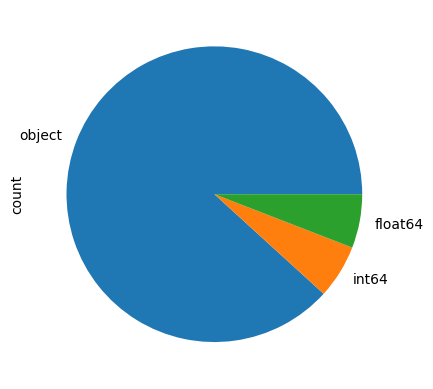

In [6]:
df.dtypes.value_counts().plot.pie() #pour transformer en graphique matplotlib

Notre jeux de donnée est majoritairement de type object, aspect a ne pas négligé

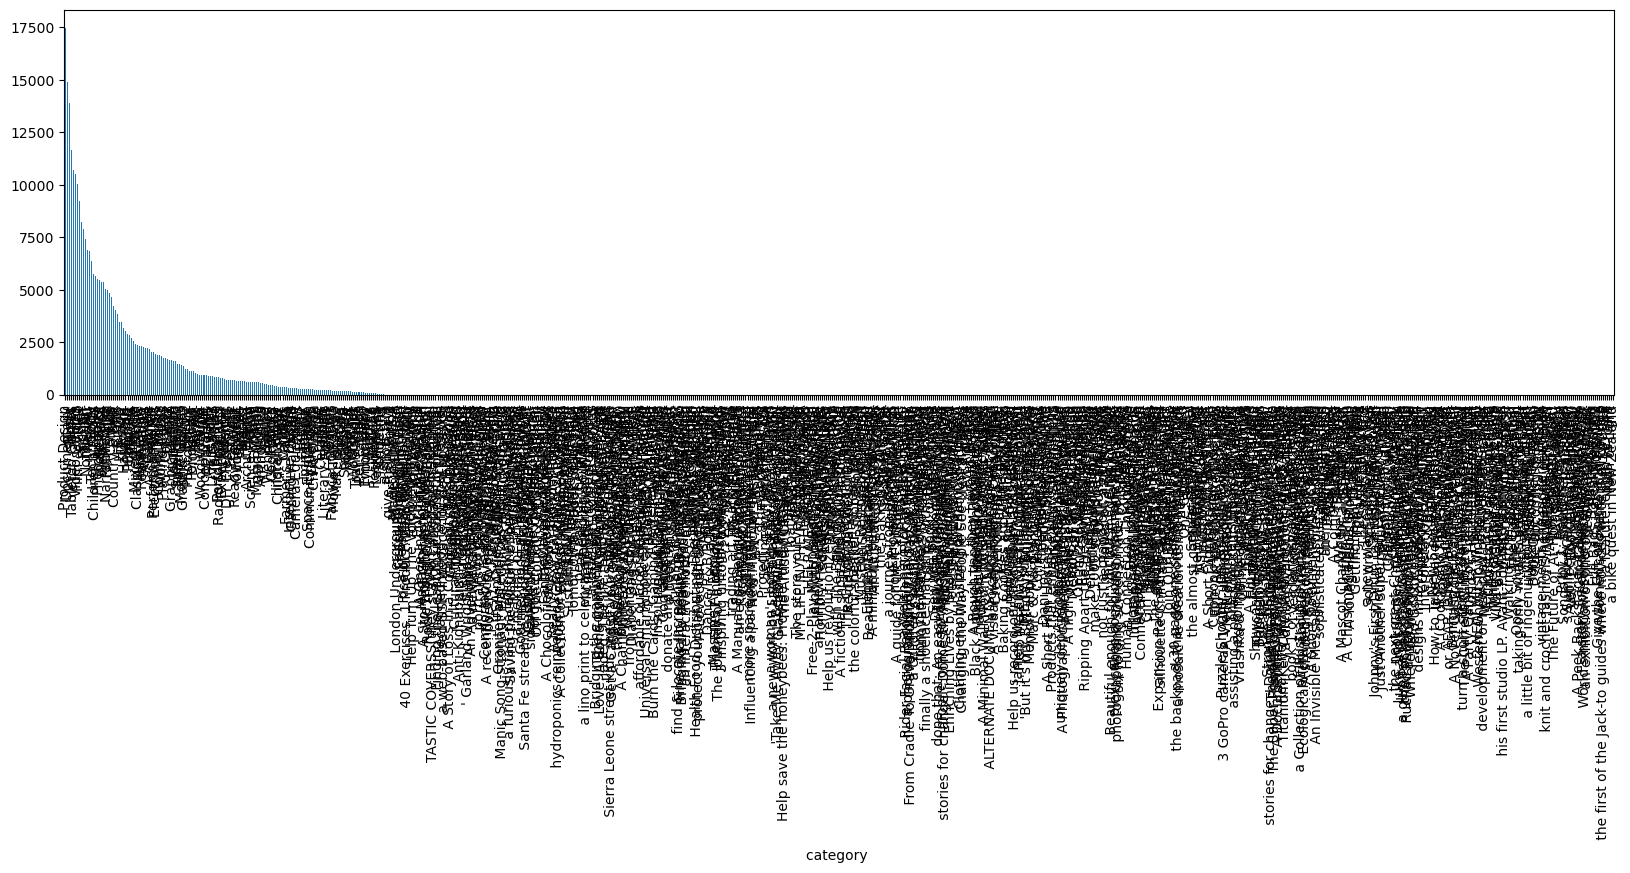

In [7]:
unique_main_categorie = df['category '].value_counts()
plt.figure(figsize=(20, 5))
unique_main_categorie.plot.bar()
plt.show()


#### currency
Nous avons les dévises utilisées dans la plateforme ['USD', 'GBP', 'CAD', 'EUR', 'AUD', 'SEK', 'NZD', 'DKK', 'NOK', 'CHF', 'MXN', 'SGD', 'HKD']. On ne considère que ces dévise là; les autres sont considérés comme bruit, nous supposons qu'elles font peut être référence à une dévise utiisée dans la plateform. Nous supprimons les bruits (nous considerons que la valeur est manquante).

In [8]:
currency = ['USD', 'GBP', 'CAD', 'EUR', 'AUD', 'SEK', 'NZD', 'DKK', 'NOK', 'CHF', 'MXN', 'SGD', 'HKD']
for i in range(0, len(df['currency '])):
    if(df['currency '][i] in currency):
        pass
    else:
        df['currency '][i] = np.nan
df['currency '].value_counts()

C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\2561021039.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['currency '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\2561021039.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['currency '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\2561021039.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['currency '][i] = np.nan
C:\Users\yvan\AppDa

C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\2561021039.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['currency '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\2561021039.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['currency '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\2561021039.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['currency '][i] = np.nan
C:\Users\yvan\AppDa

C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\2561021039.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['currency '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\2561021039.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['currency '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\2561021039.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['currency '][i] = np.nan
C:\Users\yvan\AppDa

C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\2561021039.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['currency '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\2561021039.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['currency '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\2561021039.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['currency '][i] = np.nan
C:\Users\yvan\AppDa

C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\2561021039.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['currency '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\2561021039.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['currency '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\2561021039.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['currency '][i] = np.nan
C:\Users\yvan\AppDa

C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\2561021039.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['currency '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\2561021039.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['currency '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\2561021039.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['currency '][i] = np.nan
C:\Users\yvan\AppDa

C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\2561021039.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['currency '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\2561021039.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['currency '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\2561021039.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['currency '][i] = np.nan
C:\Users\yvan\AppDa

C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\2561021039.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['currency '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\2561021039.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['currency '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\2561021039.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['currency '][i] = np.nan
C:\Users\yvan\AppDa

C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\2561021039.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['currency '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\2561021039.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['currency '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\2561021039.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['currency '][i] = np.nan
C:\Users\yvan\AppDa

C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\2561021039.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['currency '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\2561021039.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['currency '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\2561021039.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['currency '][i] = np.nan
C:\Users\yvan\AppDa

C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\2561021039.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['currency '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\2561021039.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['currency '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\2561021039.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['currency '][i] = np.nan
C:\Users\yvan\AppDa

C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\2561021039.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['currency '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\2561021039.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['currency '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\2561021039.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['currency '][i] = np.nan
C:\Users\yvan\AppDa

C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\2561021039.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['currency '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\2561021039.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['currency '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\2561021039.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['currency '][i] = np.nan
C:\Users\yvan\AppDa

currency 
USD    260298
GBP     27968
CAD     12197
EUR     11555
AUD      6347
SEK      1300
NZD      1164
DKK       841
NOK       540
CHF       478
MXN       214
SGD       119
HKD        97
Name: count, dtype: int64

In [9]:
#Deadline
#Si une valeur ne peut être convertie en date elle est supprimée (nous considerons que la valeur est manquante)

df['deadline '] = pd.to_datetime(df['deadline '],errors='coerce')

In [10]:
#launched
#Si une valeur ne peut être convertie en date elle est supprimée (nous considerons que la valeur est manquante)

df['launched '] = pd.to_datetime(df['launched '],errors='coerce')

In [11]:
#goal
#Si une valeur ne peut être convertie en numéric elle est supprimée (nous considerons que la valeur est manquante)

df['goal '] = pd.to_numeric(df['goal '], errors = 'coerce')

In [12]:
#pledged
#Si une valeur ne peut être convertie en numéric elle est supprimée (nous considerons que la valeur est manquante)

df['pledged '] = pd.to_numeric(df['pledged '], errors = 'coerce')

In [13]:
#state
#Nous disposons 6 états possible (succès, échec, en cours, annulé, indéfini et suspendu.) 
#si une valeur est différente de ces 6 états elle est supprimée et considéré comme manquante

state = ['failed', 'successful', 'canceled', 'live', 'undefined', 'suspended']

In [14]:
for i in range(0, len(df['state '])):
    if(df['state '][i] in state):
        pass
    else:
        df['state '][i] = np.nan
df['state '].value_counts()

C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\3262964167.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['state '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\3262964167.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['state '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\3262964167.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['state '][i] = np.nan
C:\Users\yvan\AppData\Local\

C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\3262964167.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['state '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\3262964167.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['state '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\3262964167.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['state '][i] = np.nan
C:\Users\yvan\AppData\Local\

C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\3262964167.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['state '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\3262964167.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['state '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\3262964167.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['state '][i] = np.nan
C:\Users\yvan\AppData\Local\

C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\3262964167.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['state '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\3262964167.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['state '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\3262964167.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['state '][i] = np.nan
C:\Users\yvan\AppData\Local\

C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\3262964167.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['state '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\3262964167.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['state '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\3262964167.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['state '][i] = np.nan
C:\Users\yvan\AppData\Local\

C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\3262964167.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['state '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\3262964167.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['state '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\3262964167.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['state '][i] = np.nan
C:\Users\yvan\AppData\Local\

C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\3262964167.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['state '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\3262964167.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['state '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\3262964167.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['state '][i] = np.nan
C:\Users\yvan\AppData\Local\

C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\3262964167.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['state '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\3262964167.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['state '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\3262964167.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['state '][i] = np.nan
C:\Users\yvan\AppData\Local\

C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\3262964167.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['state '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\3262964167.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['state '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\3262964167.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['state '][i] = np.nan
C:\Users\yvan\AppData\Local\

C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\3262964167.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['state '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\3262964167.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['state '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\3262964167.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['state '][i] = np.nan
C:\Users\yvan\AppData\Local\

C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\3262964167.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['state '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\3262964167.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['state '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\3262964167.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['state '][i] = np.nan
C:\Users\yvan\AppData\Local\

C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\3262964167.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['state '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\3262964167.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['state '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\3262964167.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['state '][i] = np.nan
C:\Users\yvan\AppData\Local\

state 
failed        168221
successful    113081
canceled       32354
live            4428
undefined       3555
suspended       1479
Name: count, dtype: int64

In [15]:

#country
#Si un pays n'est pas dans la liste des pays autorisés il est supprimé

country = ['US', 'GB', 'CA', 'AU', 'DE', 'NL', 'FR', 'IT', 'ES', 'SE', 'NZ', 'DK',
           'IE', 'NO', 'CH', 'BE', 'AT', 'MX', 'SG', 'HK', 'LU']

for i in range(0, len(df['country '])):
    if(df['country '][i] in country):
        pass
    else:
        df['country '][i] = np.nan
df['country '].value_counts()

C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\

C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\

C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\

C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\

C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\

C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\

C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\

C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\

C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\

C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\

C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\

C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\

C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\

C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\

C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\

C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\

C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\

C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\

C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\

C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\

C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\

C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\

C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\

C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\

C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\

C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\

C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\

C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\

C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\

C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\

C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\

C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\

C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\

C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\

C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\

C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\

C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\

C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\

C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\

C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\

C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\Local\Temp\ipykernel_13236\566071550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country '][i] = np.nan
C:\Users\yvan\AppData\

country 
US    257565
GB     27509
CA     11992
AU      6236
DE      2684
NL      2259
FR      1910
IT      1750
ES      1372
SE      1269
NZ      1136
DK       825
IE       575
NO       526
CH       471
BE       402
AT       377
MX       214
SG       119
HK        97
LU        40
Name: count, dtype: int64

<Axes: ylabel='count'>

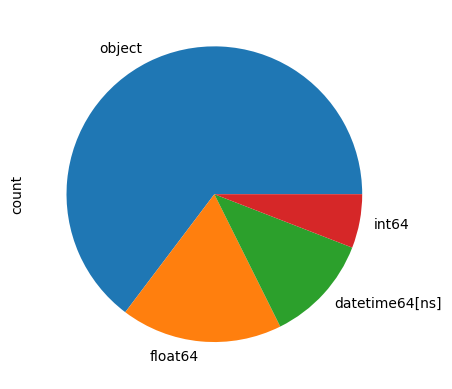

In [16]:
df.dtypes.value_counts().plot.pie() #pour transformer en graphique matplotlib

Notre graphe matplotlib nous montre que le type certaines donnees ont belle et bien ete mis a jour

In [17]:
#statistique des donnees

df.describe(include = "all").T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
ID,323750.0,NaN,NaN,NaN,1074942564.817396,5971.0,537580176.0,1075818379.0,1611070301.75,2147476221.0,619335210.130208
name,323746,321612,New EP/Music Development,41,NaN,NaN,NaN,NaN,NaN,NaN,NaN
category,323745,770,Product Design,17477,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_category,323750,120,Film & Video,57679,NaN,NaN,NaN,NaN,NaN,NaN,NaN
currency,323118,13,USD,260298,NaN,NaN,NaN,NaN,NaN,NaN,NaN
deadline,323118,NaN,NaN,NaN,2014-05-18 07:38:15.080150272,2009-05-03 08:59:59,2013-02-18 21:25:36.750000128,2014-09-07 17:59:12,2015-09-09 16:37:25.500000,2017-02-04 08:54:55,NaN
goal,323118.0,NaN,NaN,NaN,47152.516947,0.01,2000.0,5000.0,15000.0,100000000.0,1139577.480583
launched,323126,NaN,NaN,NaN,2014-04-13 14:30:42.331154944,1970-01-01 01:00:00,2013-01-17 06:50:43.750000128,2014-08-05 01:18:33.500000,2015-08-06 21:06:54,2016-12-06 10:18:31,NaN
pledged,323126.0,NaN,NaN,NaN,8696.906446,0.0,30.0,610.0,3938.54,20338986.27,89585.386438
state,323118,6,failed,168221,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Sur la colone **count** on peut voir qu'on n'a pas toutes les observations sur certains attributs.
- Le type de données n'est pas respecté, il est impossible de calculer la moyenne des observations dans le cas des attributs numériques et les valeurs les plus fréquantes dans les attributs de type dates sont des nombres
- La colonne state présente 410 valeurs différentes alors qu'on a 6 états possible
- Pour les pays d'origine de projets nous avons 162 possibilité alors que la plateforme n'autorise que 15 ([Voir ici](https://help.kickstarter.com/hc/fr/articles/115005128594-Who-can-use-Kickstarter-))
- Nous avons 13 devises locales dans la plateforme ( [Voir ici](https://www.kickstarter.com/blog/new-view-kickstarter-in-your-currency)) mais nous avons 37 possibilités dans les données


Les données sont donc corrompues.

### Analyse des valeurs manquantes

In [18]:
df.isna() #elle verifie si une variable est NOT A NUMBER

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323745,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True
323746,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True
323747,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True
323748,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True


<Axes: >

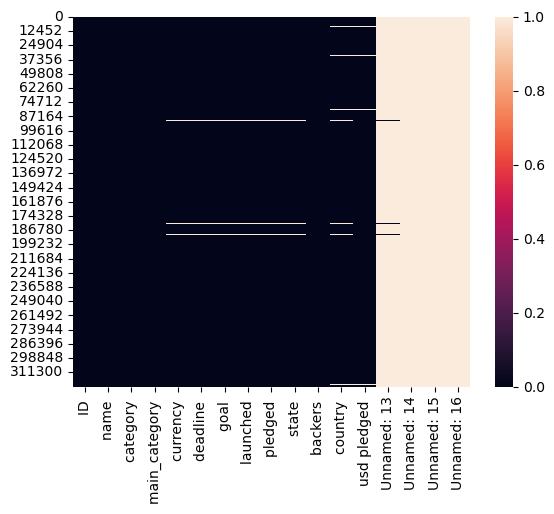

In [19]:
sns.heatmap(df.isna()) #pour visualizer tout le datset avec toutes ses lig,nes et toutes ses colones

In [20]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True) #afficher les pourcentages

ID                0.000000
main_category     0.000000
backers           0.000000
name              0.000012
category          0.000015
launched          0.001927
pledged           0.001927
deadline          0.001952
state             0.001952
currency          0.001952
goal              0.001952
usd pledged       0.011707
country           0.013659
Unnamed: 13       0.998069
Unnamed: 14       0.999963
Unnamed: 15       0.999988
Unnamed: 16       0.999997
dtype: float64

## Analyse descriptive

In [21]:
df['state ']

0             failed
1             failed
2             failed
3           canceled
4         successful
             ...    
323745      canceled
323746        failed
323747        failed
323748        failed
323749        failed
Name: state , Length: 323750, dtype: object

### Prétraitement des données

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323750 entries, 0 to 323749
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   ID              323750 non-null  int64         
 1   name            323746 non-null  object        
 2   category        323745 non-null  object        
 3   main_category   323750 non-null  object        
 4   currency        323118 non-null  object        
 5   deadline        323118 non-null  datetime64[ns]
 6   goal            323118 non-null  float64       
 7   launched        323126 non-null  datetime64[ns]
 8   pledged         323126 non-null  float64       
 9   state           323118 non-null  object        
 10  backers         323750 non-null  object        
 11  country         319328 non-null  object        
 12  usd pledged     319960 non-null  object        
 13  Unnamed: 13     625 non-null     object        
 14  Unnamed: 14     12 non-null      obj

In [23]:
columns_to_convert = ['pledged ', 'backers ', 'usd pledged ']

# Convertir les colonnes spécifiées en type float
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323750 entries, 0 to 323749
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   ID              323750 non-null  int64         
 1   name            323746 non-null  object        
 2   category        323745 non-null  object        
 3   main_category   323750 non-null  object        
 4   currency        323118 non-null  object        
 5   deadline        323118 non-null  datetime64[ns]
 6   goal            323118 non-null  float64       
 7   launched        323126 non-null  datetime64[ns]
 8   pledged         323126 non-null  float64       
 9   state           323118 non-null  object        
 10  backers         323127 non-null  float64       
 11  country         319328 non-null  object        
 12  usd pledged     319337 non-null  float64       
 13  Unnamed: 13     625 non-null     object        
 14  Unnamed: 14     12 non-null      obj

In [24]:
print(df.describe())

                ID                       deadline          goal   \
count  3.237500e+05                         323118  3.231180e+05   
mean   1.074943e+09  2014-05-18 07:38:15.080150272  4.715252e+04   
min    5.971000e+03            2009-05-03 08:59:59  1.000000e-02   
25%    5.375802e+08  2013-02-18 21:25:36.750000128  2.000000e+03   
50%    1.075818e+09            2014-09-07 17:59:12  5.000000e+03   
75%    1.611070e+09     2015-09-09 16:37:25.500000  1.500000e+04   
max    2.147476e+09            2017-02-04 08:54:55  1.000000e+08   
std    6.193352e+08                            NaN  1.139577e+06   

                           launched       pledged        backers   \
count                         323126  3.231260e+05  323127.000000   
mean   2014-04-13 14:30:42.331154944  8.696906e+03     101.911361   
min              1970-01-01 01:00:00  0.000000e+00       0.000000   
25%    2013-01-17 06:50:43.750000128  3.000000e+01       2.000000   
50%       2014-08-05 01:18:33.500000  6.10

In [25]:
df.columns

Index(['ID ', 'name ', 'category ', 'main_category ', 'currency ', 'deadline ',
       'goal ', 'launched ', 'pledged ', 'state ', 'backers ', 'country ',
       'usd pledged ', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16'],
      dtype='object')

# Nétoyage des données
Nous allons détecter et traiter les anomalies dans les données.

In [26]:
 #elimination des colonnes dont les valeurs manquantes sont supperieur a 90%
    
df=df[df.columns[(df.isna().sum()/df.shape[0]).sort_values(ascending=True)  < 0.9]]

In [27]:
df.columns

Index(['ID ', 'name ', 'category ', 'main_category ', 'currency ', 'deadline ',
       'goal ', 'launched ', 'pledged ', 'state ', 'backers ', 'country ',
       'usd pledged '],
      dtype='object')

In [28]:
# Supprimer les colonnes inutiles
#columns_to_drop = ['ID ', 'name ', 'currency ', 'deadline ', 'launched ']
columns_to_drop = ['ID ', 'name ', 'usd pledged ', 'pledged ', 'main_category ', 'currency ', 'deadline ', 'launched ']

df = df.drop(columns=columns_to_drop)

In [29]:
df.shape #on regarde les nouvelles dimenssions de notre dataset

(323750, 5)

In [30]:
df.head()

,category,goal,state,backers,country
0,Poetry,1000.0,failed,0.0,GB
1,Narrative Film,45000.0,failed,3.0,US
2,Music,5000.0,failed,1.0,US
3,Film & Video,19500.0,canceled,14.0,US
4,Restaurants,50000.0,successful,224.0,US


In [31]:
print(df.columns)

Index(['category ', 'goal ', 'state ', 'backers ', 'country '], dtype='object')


<Axes: >

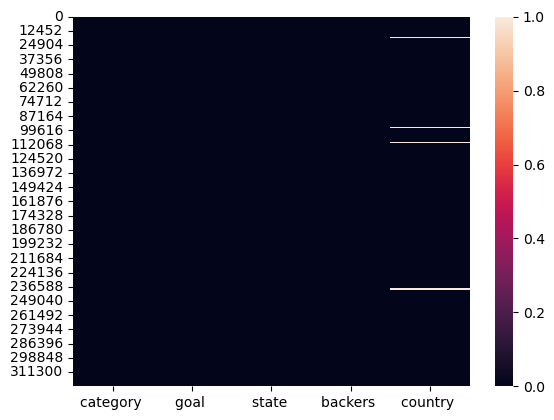

In [32]:
sns.heatmap(df.isna())

In [33]:
# Suppression des lignes avec des valeurs NaN
df = df.dropna()
df.shape

(319328, 5)

In [34]:
df.columns

Index(['category ', 'goal ', 'state ', 'backers ', 'country '], dtype='object')

<Axes: >

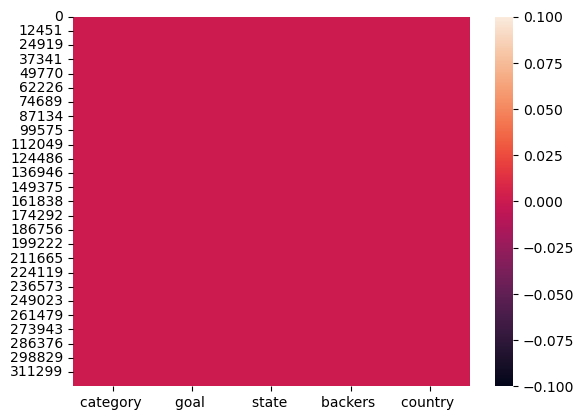

In [35]:
sns.heatmap(df.isna())

Notre dataset est a present exploitable pour un entrainement, mais avant tout nous devons d'abord juster nos donnees au mieux pour realiser un meilleur modele de machine lerarning, commencons donc par visualiser notre nouveau dataset

In [36]:
df.head() #visualisation du nouveau jeux de donnee

,category,goal,state,backers,country
0,Poetry,1000.0,failed,0.0,GB
1,Narrative Film,45000.0,failed,3.0,US
2,Music,5000.0,failed,1.0,US
3,Film & Video,19500.0,canceled,14.0,US
4,Restaurants,50000.0,successful,224.0,US


In [37]:
df.describe()

,goal,backers
count,3.193280e+05,319328.000000
mean,4.764788e+04,102.841151
std,1.146304e+06,940.383098
min,1.000000e-02,0.000000
25%,2.000000e+03,2.000000
50%,5.000000e+03,12.000000
75%,1.500000e+04,56.000000
max,1.000000e+08,219382.000000


In [38]:
df.shape #dimension des donnees a entrainer

(319328, 5)

### Analyse de fond

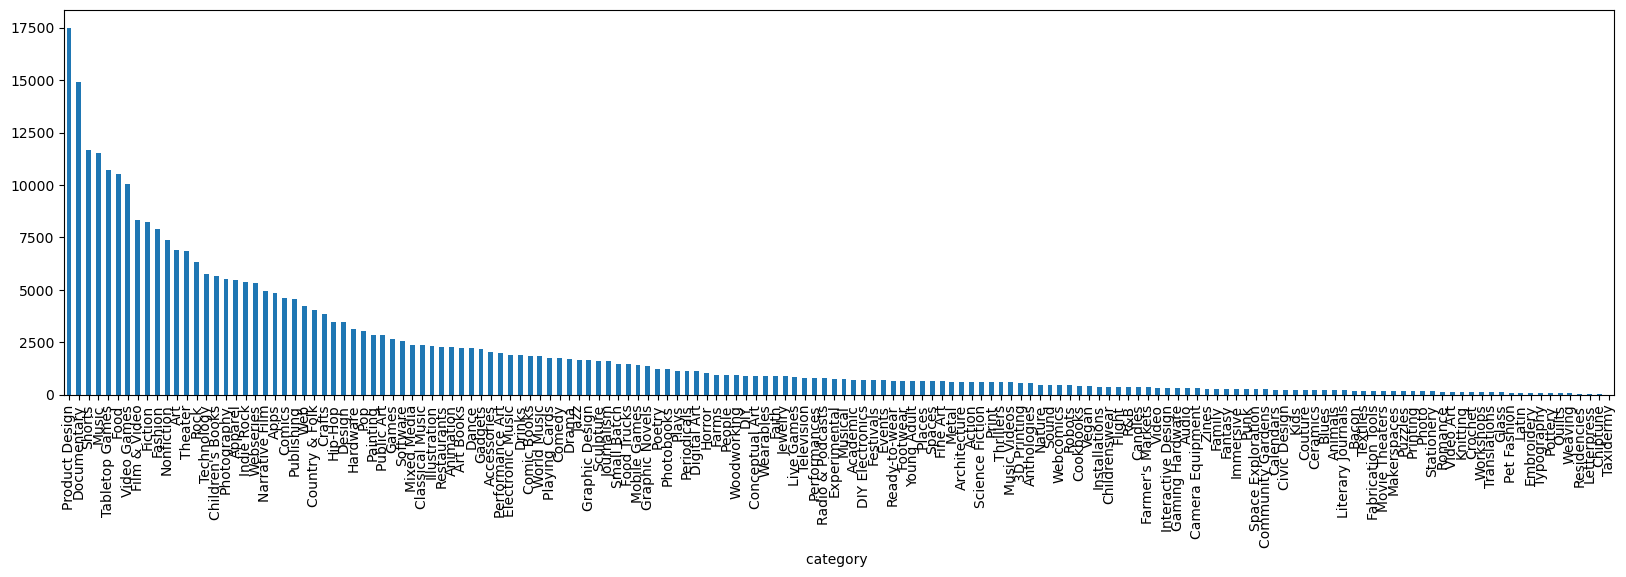

In [39]:
unique_main_categorie = df['category '].value_counts()
plt.figure(figsize=(20, 5))
unique_main_categorie.plot.bar()
plt.show()

"insights" pertinents liés au succès ou à l'échec des campagnes Kickstarter
Nous pouvons constater dans notre jeux de donnees que les variables ctegorielles qui inpactent fortement sur la reussite ou l'echec des campagnes sont: goal Montant en monnaie locale demandé initialement par le projet, country pays d'origine du projet, backers Le nombre de supporters qui ont investi dans le projet., main_category La catégorie principale dans laquelle le projet s'inscrit. Par exemple, "Poésie", "Alimentation", "Musique« , etc. et
category Une description plus précise de la catégorie principale. Sous-groupe de la catégorie principale . Par exemple, "Boissons" serait un 
sous-groupe de la catégorie "Alimentation" de l'attribut catégorie principale.

les insights qui realisent une forte corelation avec la variable cible sont : le pays, la cathegorie, et le nombre de supporters qui ont investis dans le projet, on pourrait donc entrainer notre modele sur ces variables la

In [40]:
df.columns

Index(['category ', 'goal ', 'state ', 'backers ', 'country '], dtype='object')

In [41]:
# Convertir les variables catégorielles en variables numériques
label_encoder = LabelEncoder()
#df['launched '] = label_encoder.fit_transform(df['launched '])
df['backers '] = label_encoder.fit_transform(df['backers '])
df['goal '] = label_encoder.fit_transform(df['goal '])

#df['deadline '] = label_encoder.fit_transform(df['deadline '])
df['category '] = label_encoder.fit_transform(df['category '])
#df['main_category '] = label_encoder.fit_transform(df['main_category '])
df['country '] = label_encoder.fit_transform(df['country '])
#df['currency '] = label_encoder.fit_transform(df['currency '])

# Convertir la variable cible 'state' en variables numériques
df['state '] = label_encoder.fit_transform(df['state '])



Visualiation des "insights"

<Axes: xlabel='category ', ylabel='count'>

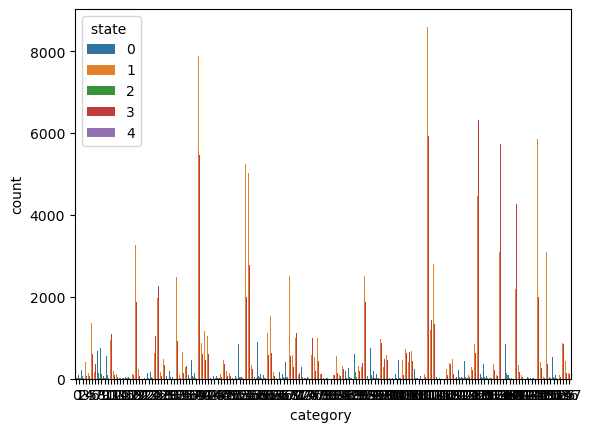

In [42]:
# relation entre la cathegory et le statut
sns.countplot(x="category ", hue="state ", data=df)

<Axes: xlabel='goal ', ylabel='count'>

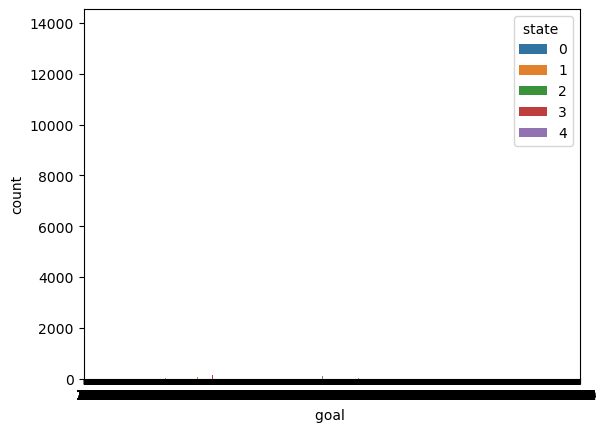

In [59]:
#relation entre target | goal
sns.countplot(x="goal ", hue="state ", data=df)

<Axes: xlabel='backers ', ylabel='count'>

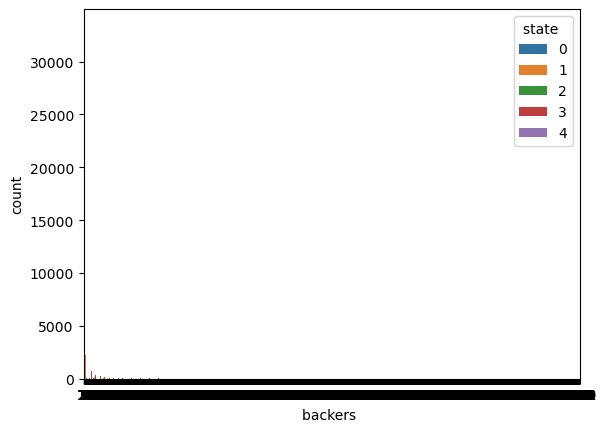

In [60]:
#relation entre target | backers
sns.countplot(x="backers ", hue="state ", data=df)

<Axes: xlabel='country ', ylabel='count'>

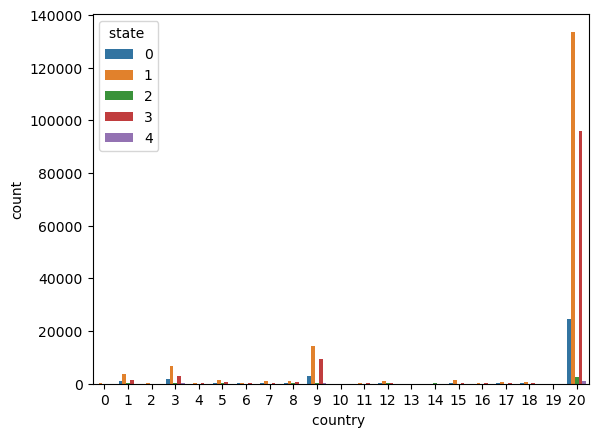

In [61]:
#relation entre country | target

sns.countplot(x="country ", hue="state ", data=df)

<Axes: xlabel='currency ', ylabel='count'>

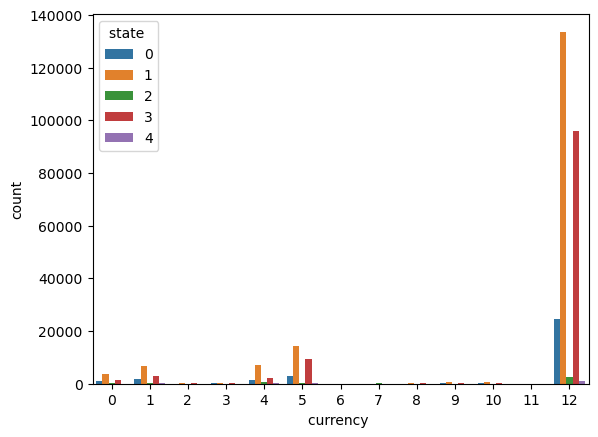

In [45]:
#relation target | currency 

sns.countplot(x="currency ", hue="state ", data=df)

Nous constatons que certains graphes matplotlib sont ilisibles ce qui peut laisser entendre que la corelation entre ces donnee n'est pas forte ou alors la qualite des donnes n'est pas normaliser suivant ces relations

Les problemes de qualite des donnees ont ete gerer par plusieures methodes:
    
    1 nettoyage des donnes:
        supprimer les valeurs manquantes, corriger les erreures et les incoherences
    
    2 Normalisation des donnees:
        mettre les donnees dans une plage commune pour eviter les ecarts de magnitude
    
    3 Gestion des valeurs aberentes:
        identifier et traiter les valeur les valeurs aberentes qui peuvent fausser les resultats du modele
    
    4 Traitement des donnees manquantes:
        remplir ou supprimer les valeurs manquantes de maniere approprie
    
    5 Validation croisee:
        utilisation des techniques de validation croisee pour evaluer la performance du modele sur differentes partitions des donnees
   
    6 Surveillance continu:
        surveiller regulierement la quqlite des donnees et mettre a jour le modele si necessaire
    
    NB: les deux derniers points n'ont pas encore ete implementer dans notre modele

Dans ce model nous allons utiliser une RandomForest, celle si est un algorithme qui utilise un ensemble d'arbre de decision pour effectuer des predictions et des classifications. Chaque arbre dans la foret est construit en utilisant un echantillon aleatoir des donnees d'entrainement et les predictions finales sont obtenues en agregeant les predictions de chaque arbre. Cela permet d'ameliorer la precision et la stabilite des modeles predictifs

train score meme donnee  0.9333325504380299
train score donnee differentes  0.7890270253342937
Accuracy: 0.79
Classification Report:
              precision    recall  f1-score   support

           0       0.20      0.08      0.11      6474
           1       0.78      0.88      0.82     33647
           2       0.18      0.04      0.07       872
           3       0.87      0.90      0.89     22564
           4       0.05      0.01      0.02       309

    accuracy                           0.79     63866
   macro avg       0.42      0.38      0.38     63866
weighted avg       0.74      0.79      0.76     63866

[ 40873  81747 122621 163495 204369]


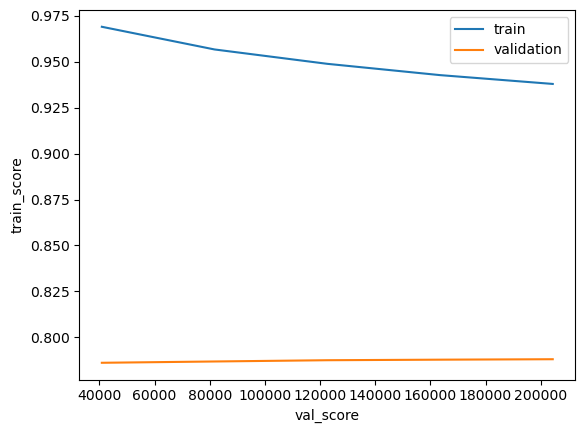

In [43]:
# Division des données en ensembles d'entraînement et de test
X = df.drop('state ', axis=1)
y = df['state ']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=56)

# Normaliser les données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#from sklearn.neighbors import KNeighborsClassifier
#model=KNeighborsClassifier(n_neighbors=1)

# Entraînement du modèle RandomForest pour une classification multiclasse
model = RandomForestClassifier(n_estimators=200, random_state=56)
model.fit(X_train, y_train)

print("train score meme donnee ", model.score(X_train, y_train))
print("train score donnee differentes ", model.score(X_test, y_test))
# Évaluation du modèle
y_pred = model.predict(X_test)

# Prédiction des probabilités pour chaque classe
y_pred_proba = model.predict_proba(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{report}')

#validation_set "ameliorer le modele"
#val=[]
#for n in range(1, 80):
#    sc=cross_val_score(KNeighborsClassifier(n), X_train, y_train, cv=5, scoring="accuracy").mean()
#    val.append(sc)

#plt.plot(val)

#overfitting: dans ce cas le mode s'est trop refectionne sur le train set et a perdu tout sens de generalisation

from sklearn.model_selection import validation_curve

#k=np.arange(1, 30)
#train_score1, val_score1=validation_curve(model, X_train, y_train, "n_estimator", k, cv=5)
#plt.plot(k, val_score.mean(axis=1))

#learning cuve: courbe d'evolution en fonction de la quantite des donnees qu'on fournit au model
N, train_score, val_score=learning_curve(model, X_train, y_train, train_sizes=np.linspace(0.2, 1.0, 5), cv=5)
print(N)
plt.plot(N, train_score.mean(axis=1), label="train")
plt.plot(N, val_score.mean(axis=1), label="validation")
plt.xlabel("val_score")
plt.ylabel("train_score")
plt.legend()

In [57]:
#for col in df:
#    plt.figure()
#    sns.heatmap(pd.crosstab(df["state "], df[col]), annot=True, fmt='d')

In [44]:
# calcul de la fonction cout

from sklearn.metrics import log_loss
logloss = log_loss(y_test, y_pred_proba)
logloss

1.374292951383991

Pour ameliorer notre fonction cout (log_loss) ainsi que la performence de notre model, il serait judicieux d'augmenter le nombre de branches dans notre foret (RandomForestClassifier(n_estimators=1000)) par exemple, et veiller a ne pas entrer en overfitting

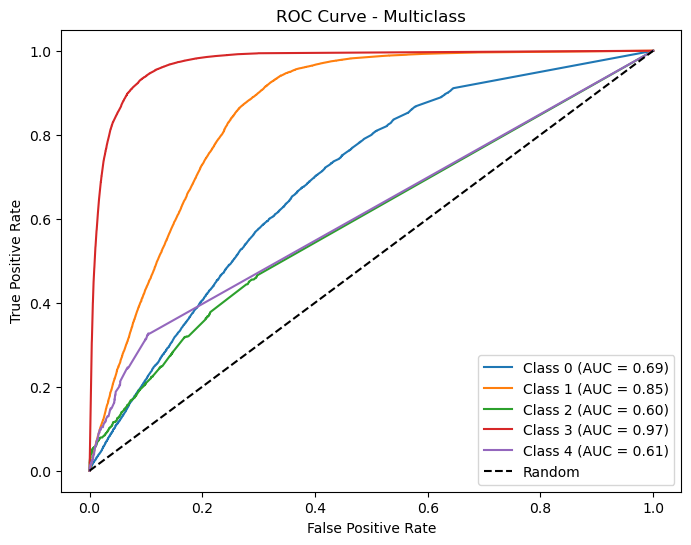

In [45]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Convertir les labels en format binaire
y_test_bin = label_binarize(y_test, classes=model.classes_)

# Calculer les courbes ROC et l'aire sous la courbe (AUC) pour chaque classe
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(model.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot de la courbe ROC pour chaque classe
plt.figure(figsize=(8, 6))
for i in range(len(model.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Multiclass')
plt.legend(loc='lower right')
plt.show()

#def champagne(model,):
#    x=np.array([]).rehape(1,)
#    print(model.predict(x))
#champagne()

### MAINTENANCE DU MODEL

 

Il pourrait y avoir plusieurs raisons pour la dégradation des performances du modèle et l'évolution des valeurs des variables. Voici quelques hypothèses possibles :

1. Changement dans la distribution des données : Si la distribution des données a changé au fil du temps, le modèle peut devenir moins précis. Il pourrait être nécessaire de réévaluer et de mettre à jour le jeu de données d'entraînement pour refléter les nouvelles conditions.

2. Dégradation de la qualité des données d'entrée : Si les données d'entrée deviennent moins fiables ou moins précises, cela peut affecter les performances du modèle. Il peut être nécessaire de vérifier et d'améliorer la qualité des données avant de les utiliser pour l'entraînement.

3. Changement dans le comportement des utilisateurs ou du système : Si le comportement des utilisateurs ou du système évolue, cela peut entraîner des changements dans les valeurs des variables et affecter les performances du modèle. Il peut être nécessaire de collecter de nouvelles données pour capturer ces changements et mettre à jour le modèle en conséquence.

Pour résoudre cette situation, voici quelques actions possibles :

1. Collecter de nouvelles données : Il peut être nécessaire de collecter de nouvelles données qui représentent les conditions actuelles et les valeurs des variables.

2. Réévaluer et mettre à jour le modèle : En utilisant les nouvelles données, réévaluez le modèle existant ou entraînez un nouveau modèle en utilisant des techniques plus avancées si nécessaire.

3. Effectuer une analyse approfondie : Analysez les changements dans les valeurs des variables et identifiez celles qui ont le plus d'impact sur les performances du modèle. Vous pouvez ensuite prendre des mesures pour corriger ou atténuer ces changements.

4. Implémenter un processus de surveillance continue : Mettez en place un processus de surveillance régulière des performances du modèle et des valeurs des variables afin de détecter rapidement toute dégradation et prendre des mesures correctives.

Il est important de noter que la résolution de ce problème peut être complexe et dépendra des spécificités du modèle, des données et du nouveau contexte dans lequel il est utilisé. Une analyse plus approfondie sera nécessaire pour proposer une solution plus précise.